In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import numpy as numpy
import glob, os
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [89]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [90]:
%%bash
cp /Users/nwolfe/git/neural-network/*.csv .

In [91]:
csv_files = ['drshape.network.acc96.dnn.ranking-result.csv']
with open(csv_files[0], 'r') as dest_f:
    data_iter = csv.reader(dest_f, 
                           delimiter = ',', 
                           quotechar = '"')
    data = [data for data in data_iter]
    data_array = numpy.asarray(data, dtype=numpy.float32)

In [92]:
data_array.shape

(100, 3)

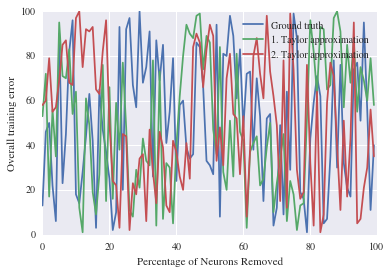

In [93]:
legend_list = [
    r'Ground truth',
    r'1. Taylor approximation',
    r'2. Taylor approximation'
]
for i in [0, 1, 2]:
    plt.plot(data_array[:, i])
    plt.xlabel('Percentage of Neurons Removed')
    plt.ylabel('Overall training error')
    plt.ylim((0, 100))

plt.legend(legend_list)
# plt.savefig('greedy_algo_comparison.pdf'.format(i+1), bbox_inches='tight', pad_inches=-0.000005)
plt.show()

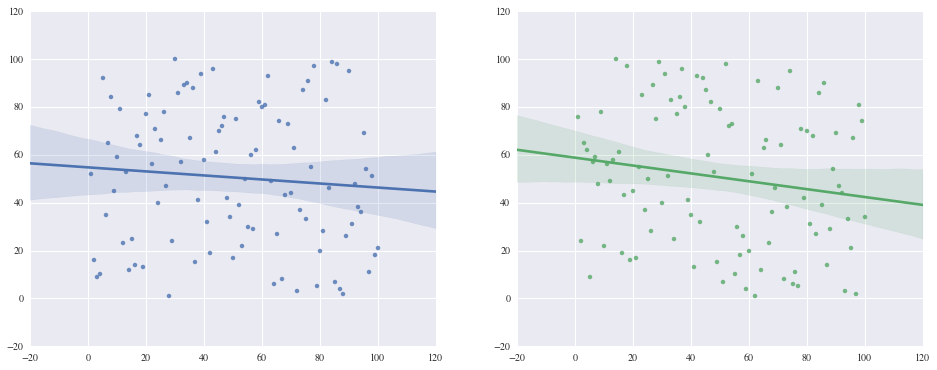

In [94]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.regplot(x=data_array[:, 0], y=data_array[:, 1], ax=ax1);
sns.regplot(x=data_array[:, 0], y=data_array[:, 2], ax=ax2);
plt.show()

In [95]:
def make_graph(name, scale=None, export=True):
    print(name)
    with open(name, 'r') as dest_f:
        data_iter = csv.reader(dest_f, 
                               delimiter = ',', 
                               quotechar = '"')
        data = [data for data in data_iter]
    data_array = numpy.asarray(data, dtype=numpy.float32)
    legend_list = [
        r'Ground truth',
        r'1st derivative approximation',
        r'2nd derivative approximation'
    ]
    for i in [0, 1, 2]:
        plt.plot(data_array[:, i])

    if scale is not None:
        plt.ylim((0, scale))
    plt.xlabel('Percentage of Neurons Removed')
    plt.ylabel('Sum of Squared Errors')
    plt.legend(legend_list)
    if export:
        plt.savefig('plot.median.'+name+'.pdf'.format(i+1), bbox_inches='tight', pad_inches=0.05)
    plt.show()

In [96]:
%%bash
cp /Users/nwolfe/git/neural-network/*.csv .

circle.network.dnn.accuracy-dropoff-comparison.csv


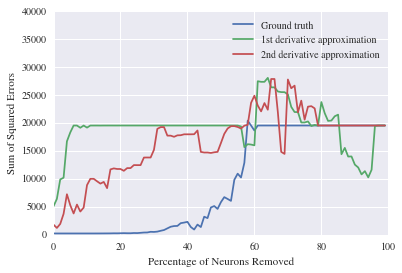

circle.network.dnn.greedy-algo-comparison.csv


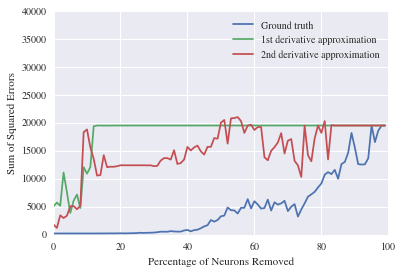

In [97]:
make_graph('circle.network.dnn.accuracy-dropoff-comparison.csv',40000)
make_graph('circle.network.dnn.greedy-algo-comparison.csv',40000)

rshape.network.dnn.accuracy-dropoff-comparison.csv


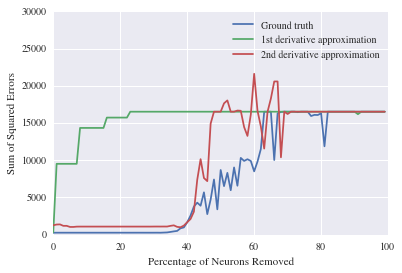

rshape.network.dnn.greedy-algo-comparison.csv


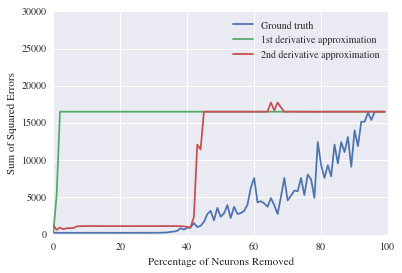

In [98]:
make_graph('rshape.network.dnn.accuracy-dropoff-comparison.csv',30000)
make_graph('rshape.network.dnn.greedy-algo-comparison.csv',30000)

diamond.network.dnn.accuracy-dropoff-comparison.csv


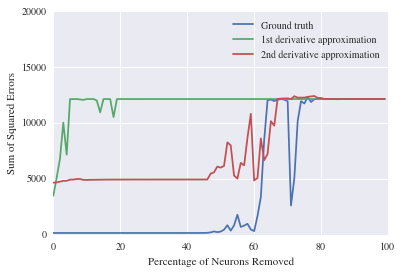

diamond.network.dnn.greedy-algo-comparison.csv


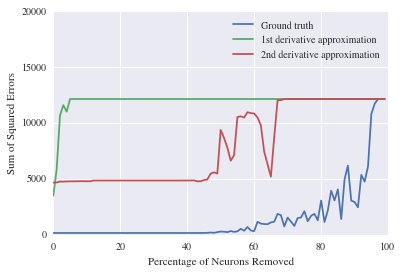

In [99]:
make_graph('diamond.network.dnn.accuracy-dropoff-comparison.csv',20000)
make_graph('diamond.network.dnn.greedy-algo-comparison.csv',20000)

drshape.network.dnn.accuracy-dropoff-comparison.csv


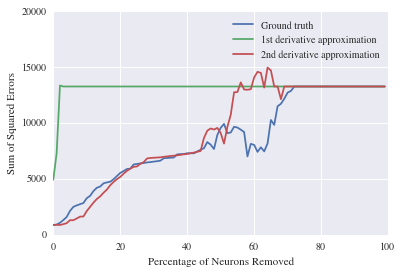

drshape.network.dnn.greedy-algo-comparison.csv


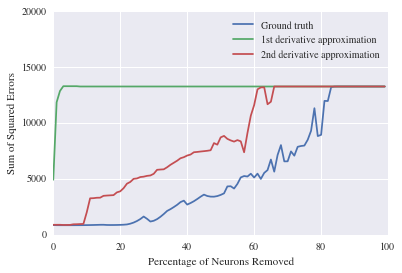

In [100]:
make_graph('drshape.network.dnn.accuracy-dropoff-comparison.csv',20000)
make_graph('drshape.network.dnn.greedy-algo-comparison.csv',20000)

# Further ideas
- To raise confidence in the first and second derivative, a numeric implementation using the quotient of differences may be used.

\begin{align}
\frac{f}{x}
\end{align}

In [101]:
%%bash
cp /Users/nwolfe/git/neural-network/*.csv .

In [102]:
def copy_files():
    os.system("cp /Users/nwolfe/git/neural-network/*.csv .") 

In [103]:
#files = [file for file in glob.glob("xor.*.csv")]
# for f in files:
#     print(f)
#     make_graph(f)

cos.network.dnn.accuracy-dropoff-comparison.csv


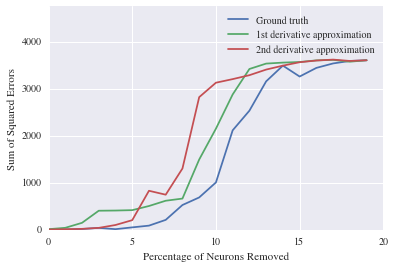

cos.network.dnn.greedy-algo-comparison.csv


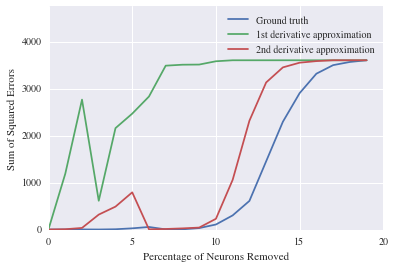

In [119]:
# files = ['mod.cos.network.dnn.accuracy-dropoff-comparison.csv','mod.cos.network.dnn.greedy-algo-comparison.csv']
files = ['cos.network.dnn.accuracy-dropoff-comparison.csv','cos.network.dnn.greedy-algo-comparison.csv']
copy_files()
for f in files:
    make_graph(f, scale=4750)

cos.big.network.dnn.accuracy-dropoff-comparison.csv


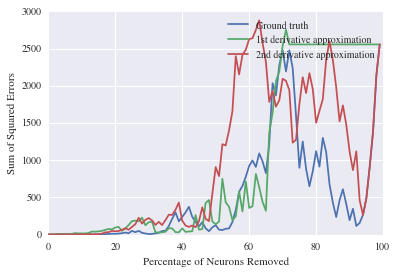

cos.big.network.dnn.greedy-algo-comparison.csv


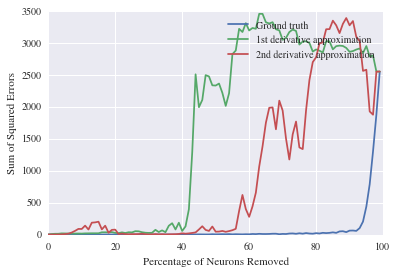

In [120]:
files = ['cos.big.network.dnn.accuracy-dropoff-comparison.csv','cos.big.network.dnn.greedy-algo-comparison.csv']
copy_files()
for f in files:
    make_graph(f)

xor.network.dnn.accuracy-dropoff-comparison.csv


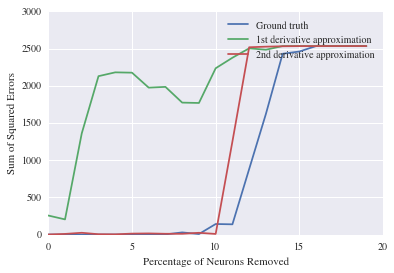

xor.network.dnn.greedy-algo-comparison.csv


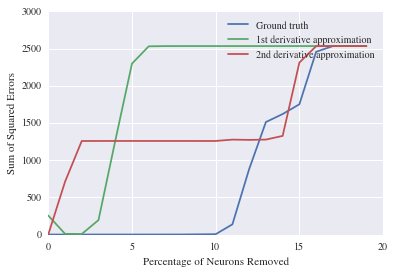

In [106]:
# files = ['mod.xor.network.dnn.accuracy-dropoff-comparison.csv','mod.xor.network.dnn.greedy-algo-comparison.csv']
files = ['xor.network.dnn.accuracy-dropoff-comparison.csv','xor.network.dnn.greedy-algo-comparison.csv']
copy_files()
for f in files:
    make_graph(f)

xor.big.network.dnn.accuracy-dropoff-comparison.csv


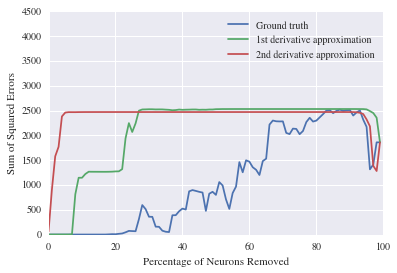

xor.big.network.dnn.greedy-algo-comparison.csv


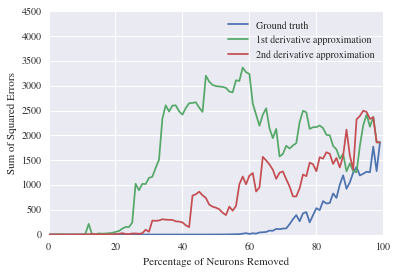

In [107]:
files = ['xor.big.network.dnn.accuracy-dropoff-comparison.csv','xor.big.network.dnn.greedy-algo-comparison.csv']
copy_files()
for f in files:
    make_graph(f,scale=4500)

In [108]:
def make_neuron_graph(name, scale=None, export=True):
    print(name)
    with open(name, 'r') as dest_f:
        data_iter = csv.reader(dest_f, 
                               delimiter = ',', 
                               quotechar = '"')
        data = [data for data in data_iter]
    data_array = numpy.asarray(data, dtype=numpy.float32)
    
    size = len(data_array[0,:])
    legend_list = []
    x = data_array[:,0]
    
    f, axarr = plt.subplots(1, 2, figsize=(16, 6))
    
    for i in range(1,size):
        y = data_array[:,i]
        axarr[0].plot(x,y)
        axarr[1].plot(x,y)
        legend_list.append('Neuron: ' + str((i-1) * 10))
        
    if scale is not None:
        axarr[0].ylim((0, scale))
        axarr[1].ylim((0, scale))
        
    axarr[0].axvline(x=1, color='red', linewidth=0.5)    
    axarr[1].axvline(x=1, color='red', linewidth=0.5)    
    
    axarr[0].set_xlabel('Gain value (1 = normal output, 0 = off)')
    axarr[0].set_ylabel('Sum of Squared Errors')
    
    axarr[1].set_xlabel('Gain value (1 = normal output, 0 = off)')
    axarr[1].set_ylabel('Sum of Squared Errors')
    
    leg = axarr[0].legend(legend_list, frameon=1, loc='upper right')
    leg.get_frame().set_facecolor('white')
    leg.get_frame().set_edgecolor('black')
    
    leg = axarr[1].legend(legend_list, frameon=1, loc='upper right')
    leg.get_frame().set_facecolor('white')
    leg.get_frame().set_edgecolor('black')
    
    axarr[0].set_yscale('log')
    axarr[1].set_yscale('linear')
    
    if export:
        plt.savefig('plot.median.'+name+'.pdf'.format(i+1), bbox_inches='tight', pad_inches=0.05)
        
    plt.show()

cos.network.gt.gain.vals.csv


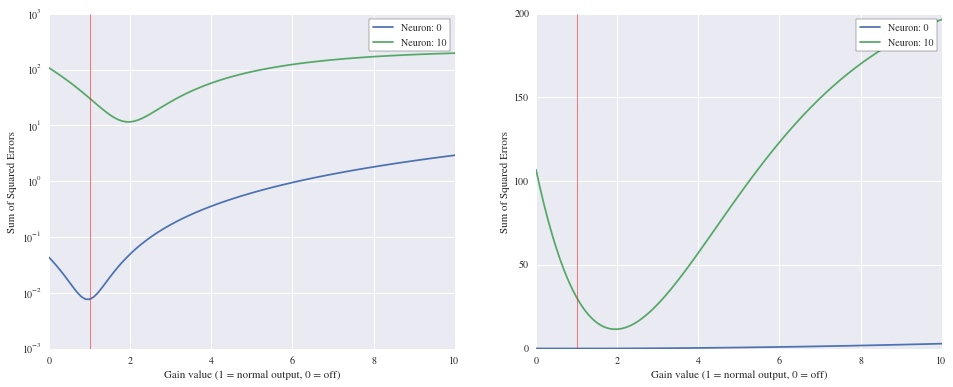

cos.network.g1.gain.vals.csv


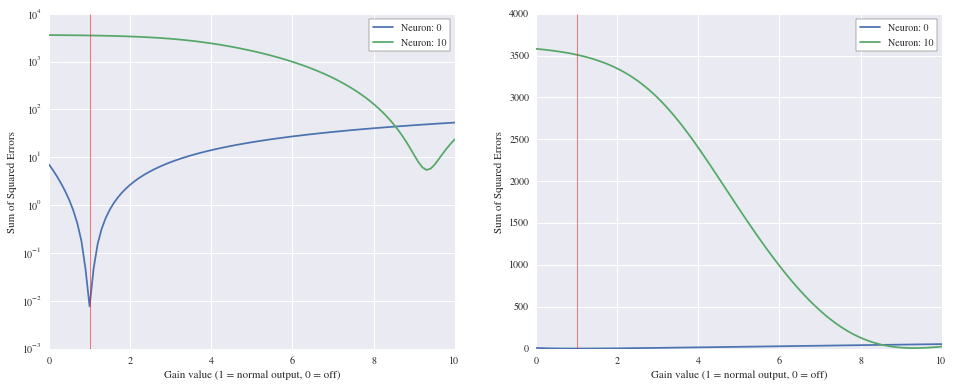

cos.network.g2.gain.vals.csv


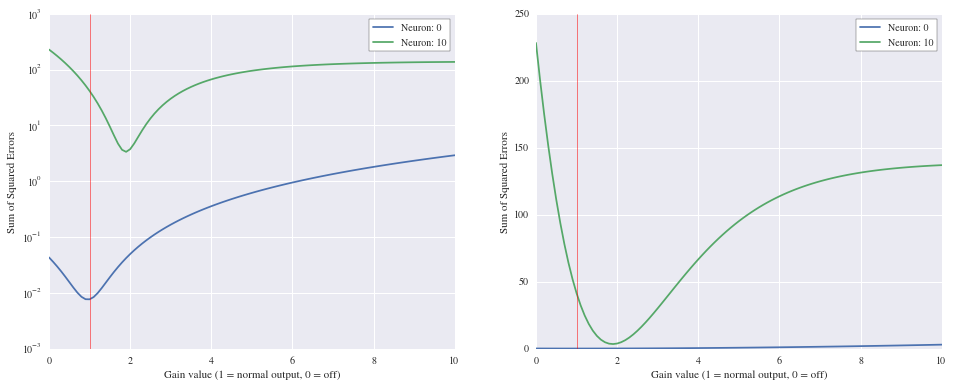

In [109]:
files = ['cos.network.gt.gain.vals.csv','cos.network.g1.gain.vals.csv','cos.network.g2.gain.vals.csv']
copy_files()
for f in files:
    make_neuron_graph(f)

xor.network.gt.gain.vals.csv


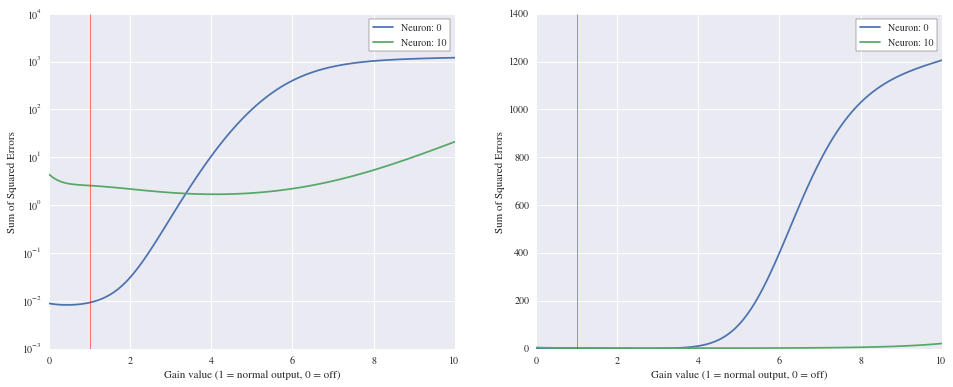

xor.network.g1.gain.vals.csv


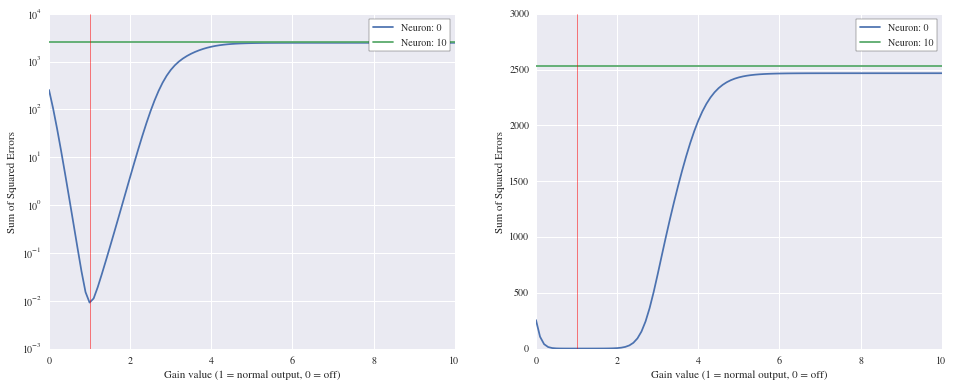

xor.network.g2.gain.vals.csv


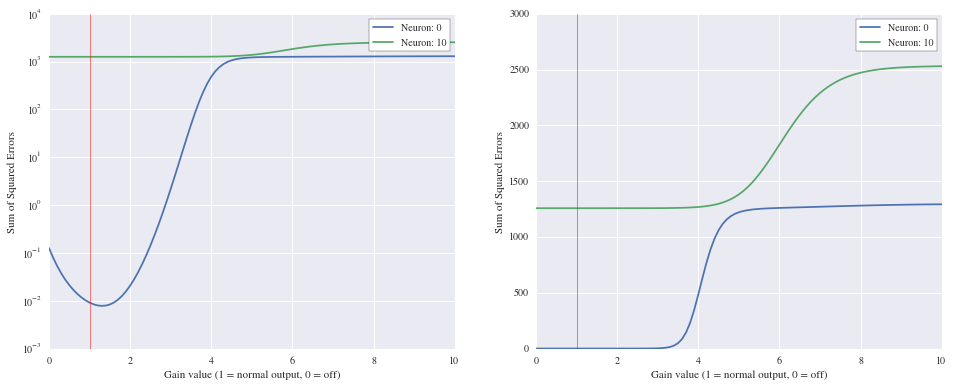

In [110]:
files = ['xor.network.gt.gain.vals.csv','xor.network.g1.gain.vals.csv','xor.network.g2.gain.vals.csv']
copy_files()
for f in files:
    make_neuron_graph(f)

rshape.network.gt.gain.vals.csv


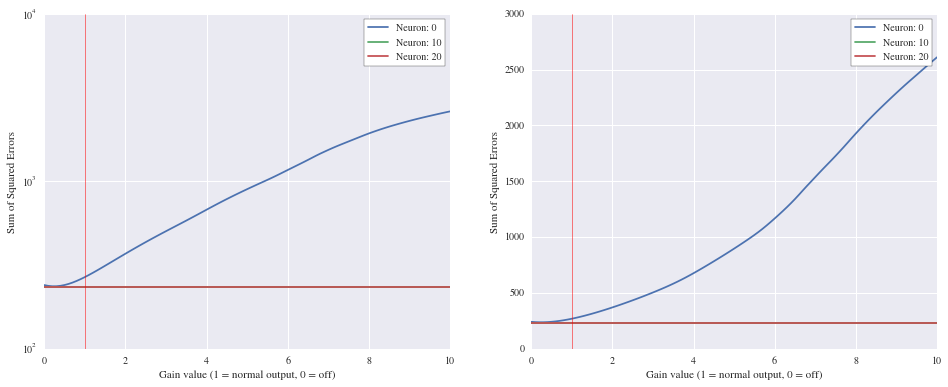

rshape.network.g1.gain.vals.csv


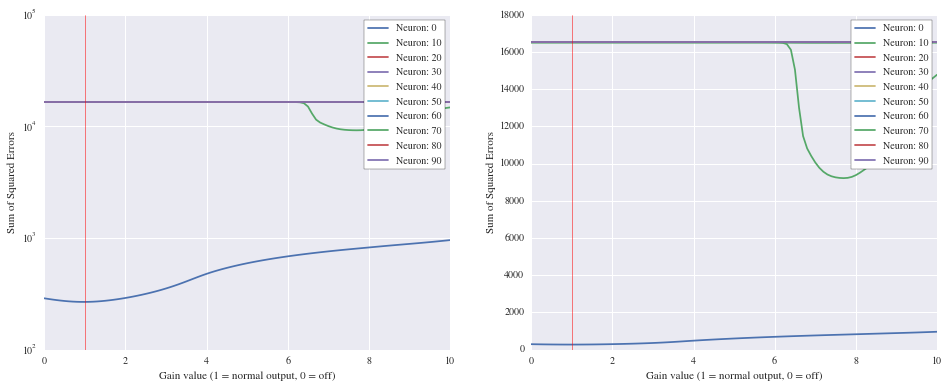

rshape.network.g2.gain.vals.csv


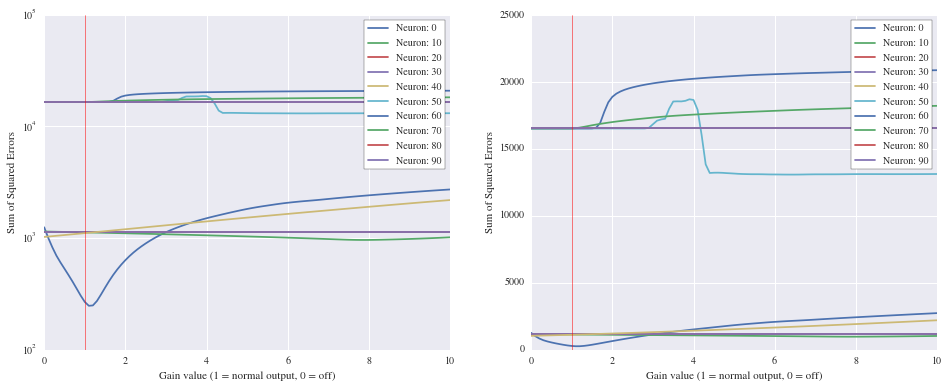

In [111]:
files = ['rshape.network.gt.gain.vals.csv','rshape.network.g1.gain.vals.csv','rshape.network.g2.gain.vals.csv']
copy_files()
for f in files:
    make_neuron_graph(f)

diamond.network.gt.gain.vals.csv


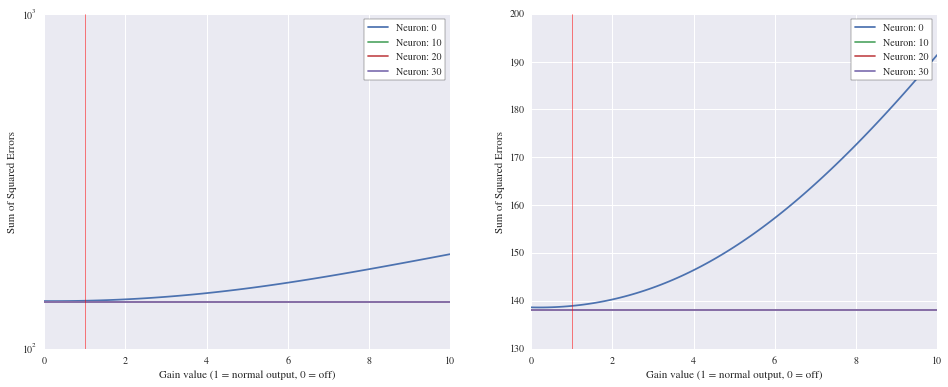

diamond.network.g1.gain.vals.csv


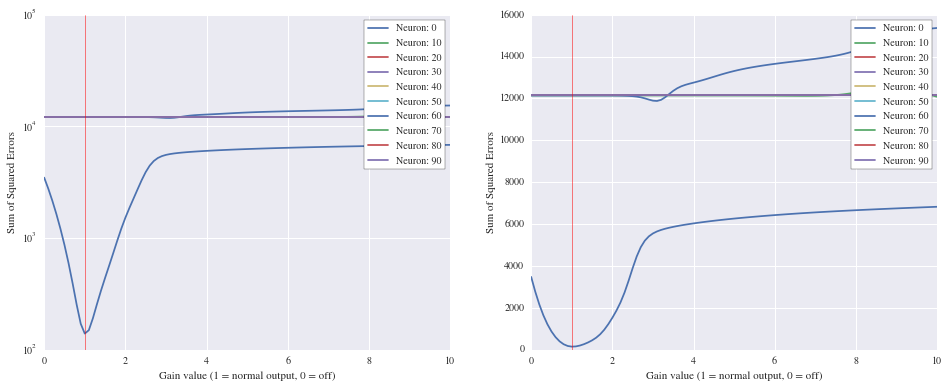

diamond.network.g2.gain.vals.csv


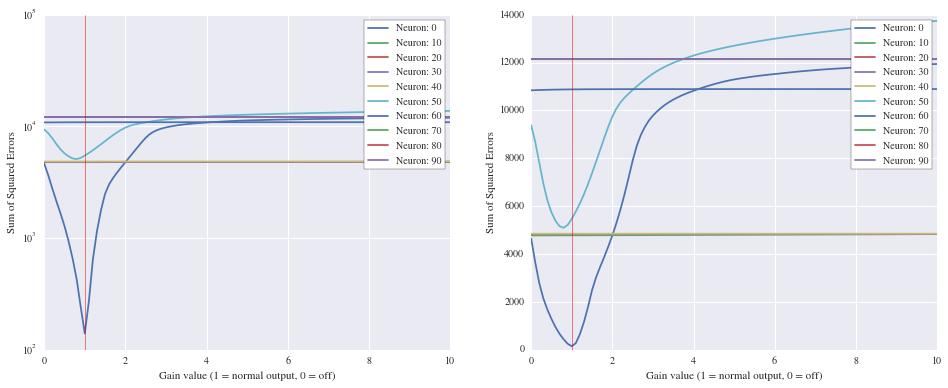

In [112]:
files = ['diamond.network.gt.gain.vals.csv','diamond.network.g1.gain.vals.csv','diamond.network.g2.gain.vals.csv']
copy_files()
for f in files:
    make_neuron_graph(f)

cos.big.network.gt.gain.vals.csv


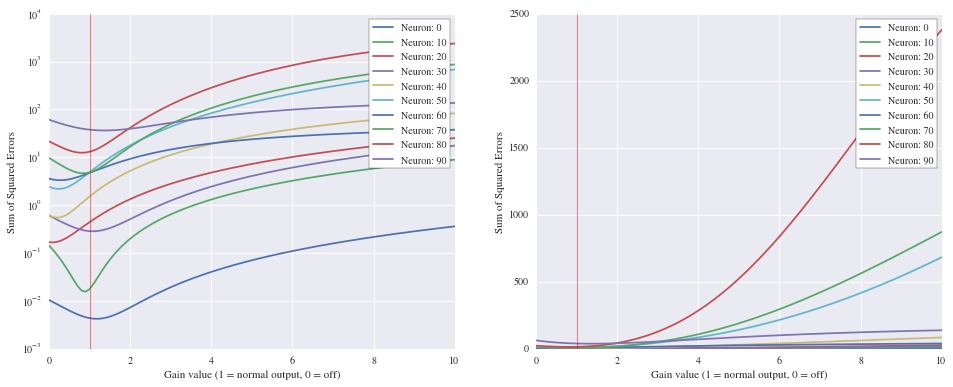

cos.big.network.g1.gain.vals.csv


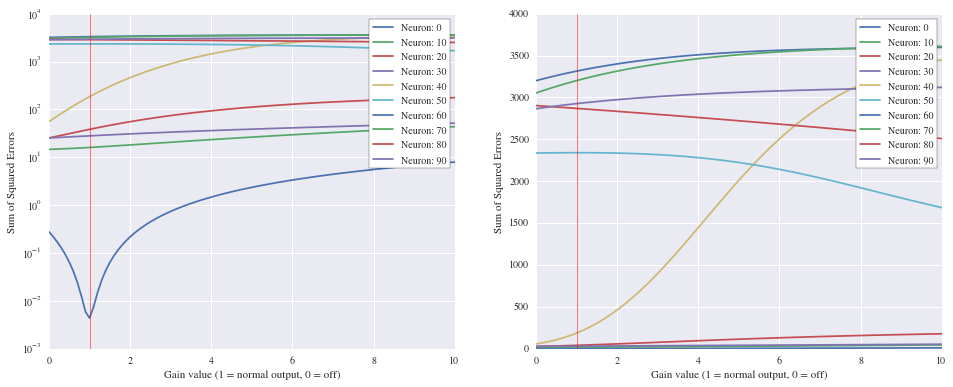

cos.big.network.g2.gain.vals.csv


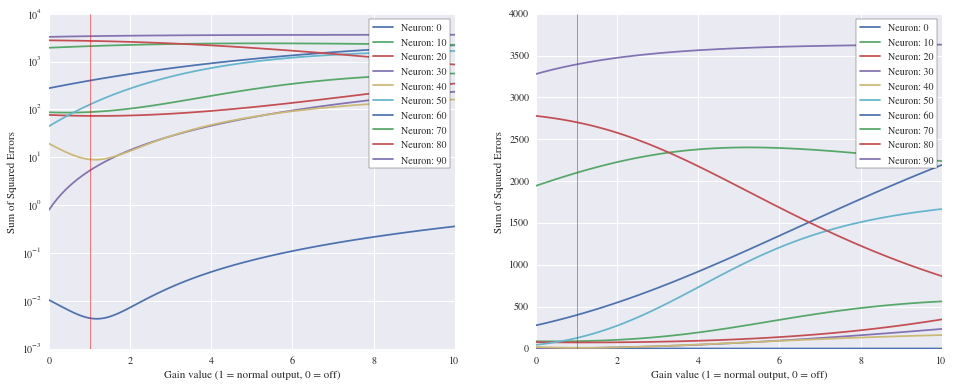

In [113]:
files = ['cos.big.network.gt.gain.vals.csv','cos.big.network.g1.gain.vals.csv','cos.big.network.g2.gain.vals.csv']
copy_files()
for f in files:
    make_neuron_graph(f)

xor.big.network.gt.gain.vals.csv


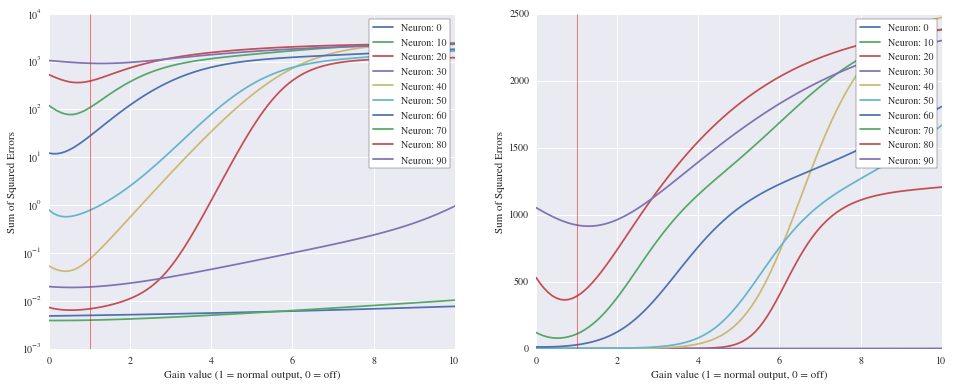

xor.big.network.g1.gain.vals.csv


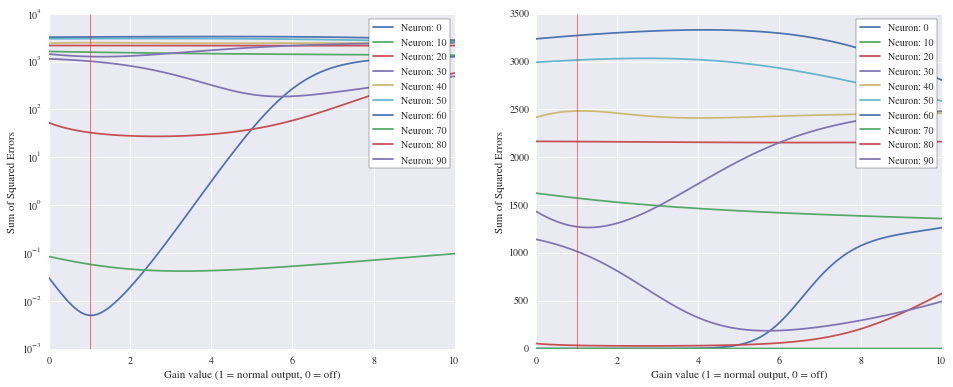

xor.big.network.g2.gain.vals.csv


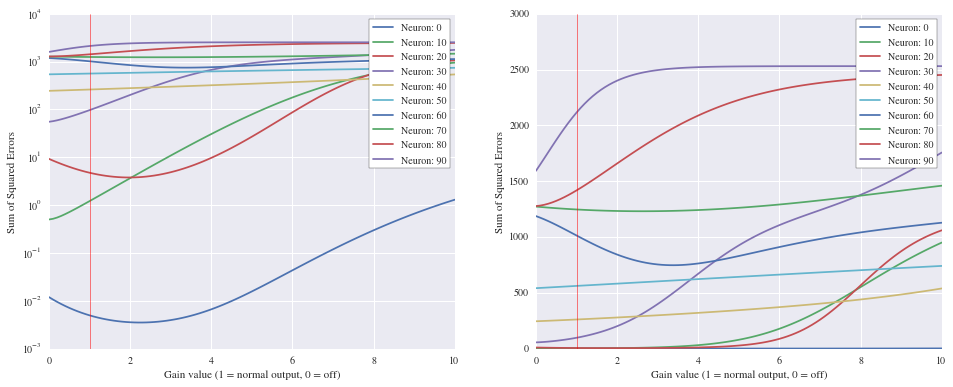

In [114]:
files = ['xor.big.network.gt.gain.vals.csv','xor.big.network.g1.gain.vals.csv','xor.big.network.g2.gain.vals.csv']
copy_files()
for f in files:
    make_neuron_graph(f)

circle.network.gt.gain.vals.csv


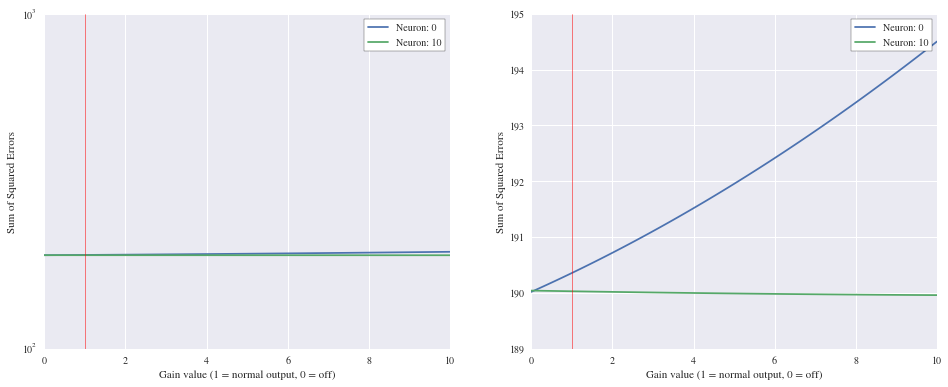

circle.network.g1.gain.vals.csv


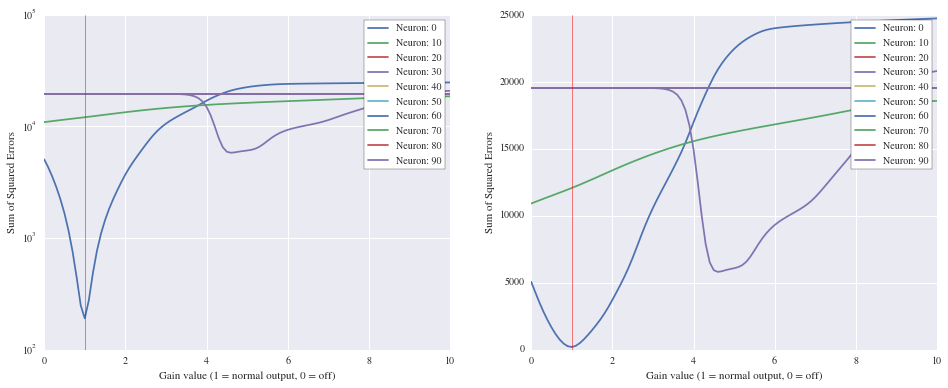

circle.network.g2.gain.vals.csv


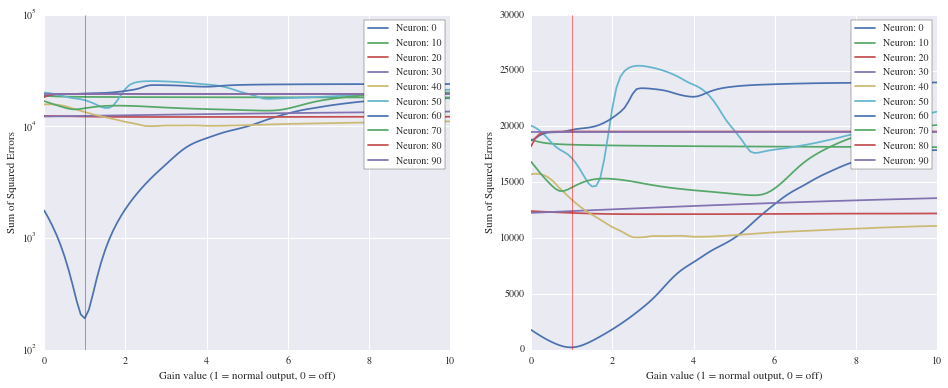

In [115]:
files = ['circle.network.gt.gain.vals.csv','circle.network.g1.gain.vals.csv','circle.network.g2.gain.vals.csv']
copy_files()
for f in files:
    make_neuron_graph(f)

drshape.network.gt.gain.vals.csv


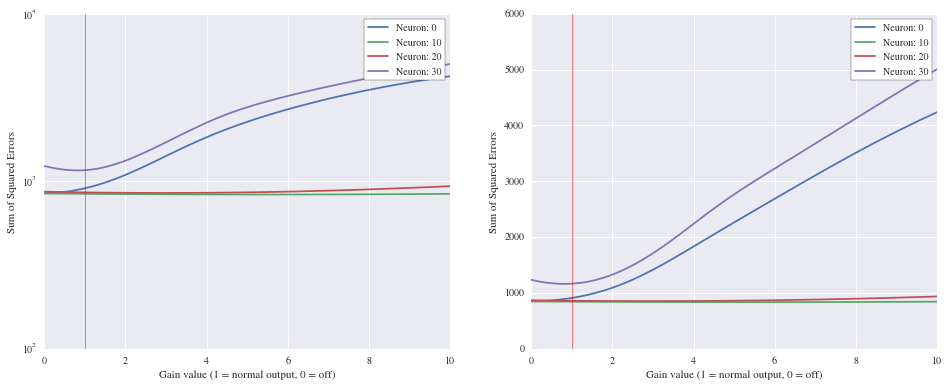

drshape.network.g1.gain.vals.csv


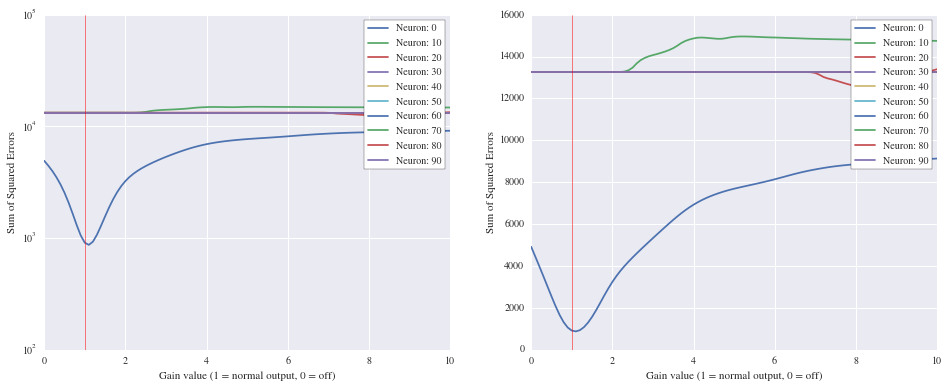

drshape.network.g2.gain.vals.csv


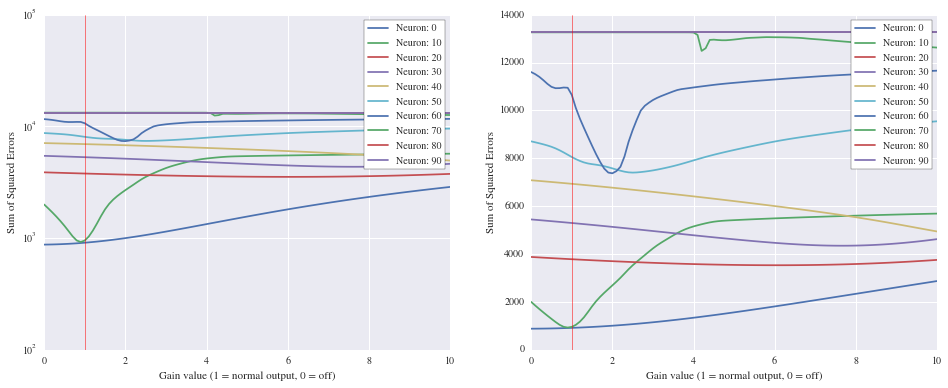

In [116]:
files = ['drshape.network.gt.gain.vals.csv','drshape.network.g1.gain.vals.csv','drshape.network.g2.gain.vals.csv']
copy_files()
for f in files:
    make_neuron_graph(f)